In [1]:
%load_ext autoreload
%autoreload 2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.1)

np.random.seed(1)
np.set_printoptions(precision=6, suppress=True)
plot_height, legend_size = 10, 18
marker_size, line_width = 2.0, 1.2
label_size = 16
dashed_linestyle = (0, (10, 10))  # 'dashed'

['exps/feature_sparsity_new_sota/2022-09-24 16:45:56.293 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.002 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=constant warmup=1.0 warmup_exp=1.0 seed=0.npy', 'exps/feature_sparsity_new_sota/2022-09-24 16:56:06.853 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_01epochs warmup=1.0 warmup_exp=1.0 seed=0.npy', 'exps/feature_sparsity_new_sota/2022-09-24 16:56:16.243 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_03epochs warmup=1.0 warmup_exp=1.0 seed=0.npy', 'exps/feature_sparsity_new_sota/2022-09-24 16:56:17.613 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_la

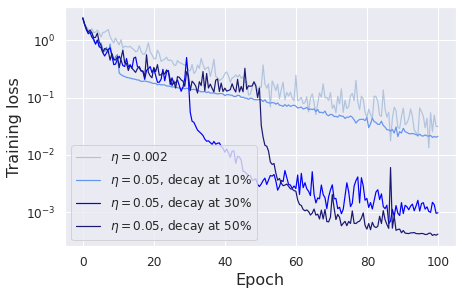

0.14290000000000003 exps/feature_sparsity_new_sota/2022-09-24 16:45:56.293 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.002 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=constant warmup=1.0 warmup_exp=1.0 seed=0.npy
0.10129999999999995 exps/feature_sparsity_new_sota/2022-09-24 16:56:06.853 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_01epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.06579999999999997 exps/feature_sparsity_new_sota/2022-09-24 16:56:16.243 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_03epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.05610000000000004 exps/feature_sparsity_new_sota/2022-09-24 16:56:17.613 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 mode

/tmp/ipykernel_78348/1929541480.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


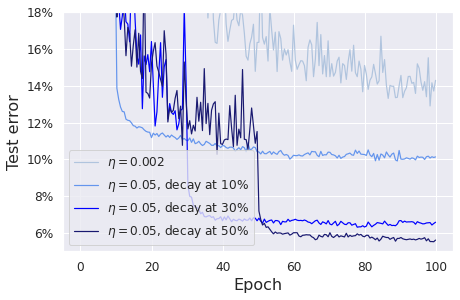

0.7060456304323106 0.006653703348977302 exps/feature_sparsity_new_sota/2022-09-24 16:45:56.293 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.002 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=constant warmup=1.0 warmup_exp=1.0 seed=0.npy
0.6857562377339318 -0.0022047927720205696 exps/feature_sparsity_new_sota/2022-09-24 16:56:06.853 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_01epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.7225952120054335 -0.0007218452862330915 exps/feature_sparsity_new_sota/2022-09-24 16:56:16.243 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_03epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.7289102389698937 0.010340763523465135 exps/feature_sparsity_new_sota/2022

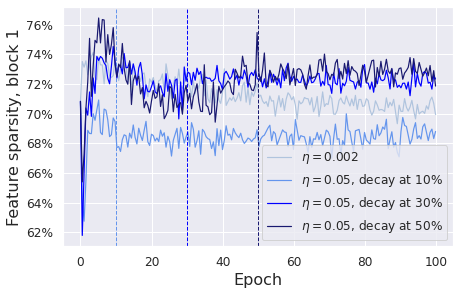

0.7099435868717375 0.006252273627689875 exps/feature_sparsity_new_sota/2022-09-24 16:45:56.293 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.002 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=constant warmup=1.0 warmup_exp=1.0 seed=0.npy
0.6833002964655558 0.001539228757222455 exps/feature_sparsity_new_sota/2022-09-24 16:56:06.853 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_01epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.582079413391295 -0.005218577680133563 exps/feature_sparsity_new_sota/2022-09-24 16:56:16.243 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_03epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.54658480769112 -0.0008936149279277217 exps/feature_sparsity_new_sota/2022-09-

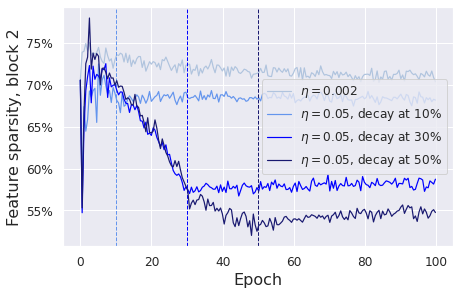

0.7716290212812877 -0.003869304611569424 exps/feature_sparsity_new_sota/2022-09-24 16:45:56.293 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.002 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=constant warmup=1.0 warmup_exp=1.0 seed=0.npy
0.7500775314512707 0.0025659987131754214 exps/feature_sparsity_new_sota/2022-09-24 16:56:06.853 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_01epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.6539010660988944 -0.0029916980380103597 exps/feature_sparsity_new_sota/2022-09-24 16:56:16.243 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_03epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.5274619545255389 -0.01563477166493732 exps/feature_sparsity_new_sota/2022

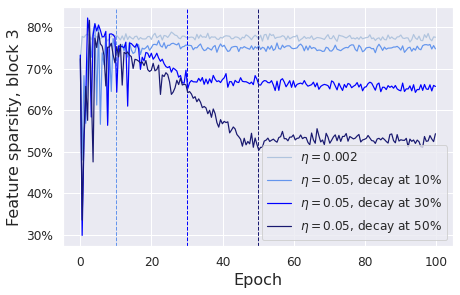

0.6542804922376361 -0.0010915315718877938 exps/feature_sparsity_new_sota/2022-09-24 16:45:56.293 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.002 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=constant warmup=1.0 warmup_exp=1.0 seed=0.npy
0.5781797340938023 0.0007900391533260942 exps/feature_sparsity_new_sota/2022-09-24 16:56:06.853 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_01epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.47983230863298687 0.007535247621082097 exps/feature_sparsity_new_sota/2022-09-24 16:56:16.243 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_03epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.4985994157337007 0.039547053382510244 exps/feature_sparsity_new_sota/2022

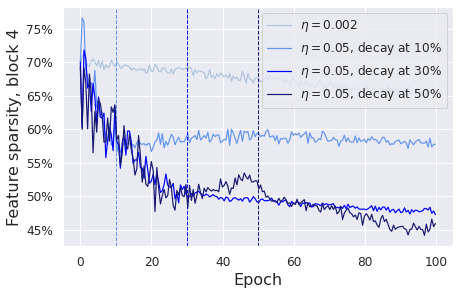

0.9890154883975074 0.0017974490211123406 exps/feature_sparsity_new_sota/2022-09-24 16:45:56.293 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.002 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=constant warmup=1.0 warmup_exp=1.0 seed=0.npy
0.9630751836867559 0.0036364964076450734 exps/feature_sparsity_new_sota/2022-09-24 16:56:06.853 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_01epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.8444222949800038 0.07466216314406626 exps/feature_sparsity_new_sota/2022-09-24 16:56:16.243 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.05 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=piecewise_03epochs warmup=1.0 warmup_exp=1.0 seed=0.npy
0.8127577645438058 0.1830291748046875 exps/feature_sparsity_new_sota/2022-09-2

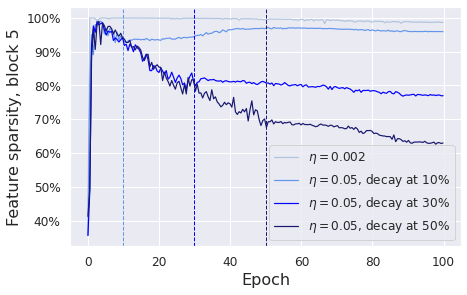

In [2]:
# Understanding the valley dynamics
n_epochs, p_label_noise = 100, 0.0
dataset, model = 'cifar10', 'resnet18'

colors = ['lightsteelblue', 'cornflowerblue', 'blue', 'midnightblue', 'black', 'green', 'orange']
dataset, exp_name, lr, l2_reg, lr_schedule, warmup, warmup_exp, model_files = 'cifar10', 'feature_sparsity_new_sota', '0.05', '0.0005', 'piecewise_', '1.0', '*', ['exps/feature_sparsity_new_sota/2022-09-24 16:45:56.293 dataset=cifar10 model=resnet18_plain epochs=100 lr_max=0.002 model_width=64 l2_reg=0.0005 sam_rho=0.0 batch_size=256 frac_train=1 p_label_noise=0.0 lr_schedule=constant warmup=1.0 warmup_exp=1.0 seed=0.npy'] 


model_width = 64
model_files += sorted(glob.glob('exps/{}/*dataset={} *lr_max={} *model_width={} *l2_reg={} *lr_schedule={}* warmup={}*={}*'.format(exp_name, dataset, lr, model_width, l2_reg, lr_schedule, warmup, warmup_exp)), key=lambda s: s.split('piecewise_')[1])
hps_str = 'dataset={} exp={} lr_max={} l2_reg={} warmup_exp={}'.format(dataset, exp_name, lr, l2_reg, warmup_exp).replace('*', '')
print(model_files)


plt.figure(figsize=(7.0, 4.4))
for i in range(len(model_files)):
    metrics = np.load(model_files[i], allow_pickle=True).item()
    print(metrics['train_loss'][-1], model_files[i])
    label = '$\eta={}$'.format(metrics['lr_max'])
    if metrics['lr_schedule'] != 'constant':
        if warmup != '1.0' or warmup_exp not in ['1.0', '*']:
            label += ', warmup'
        label += ', decay at ' + str(int(metrics['lr_schedule'][10:12])*10) + '%'
    epochs = np.array(metrics['iter']) / (50000 / metrics['batch_size'])
    ax = sns.lineplot(x=epochs, y=metrics['train_loss'], linewidth=line_width, markersize=marker_size, label=label, color=colors[i])
    # ax = sns.lineplot(x=epochs, y=metrics['train_loss_swa'], linewidth=line_width, markersize=marker_size, label=label, color=colors[i], linestyle='--')

# ax.set_ylim(10**-4, 10**1)
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Epoch', size=label_size)
ax.set_ylabel('Training loss', size=label_size)
# ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
ax.legend(loc='best')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), fontsize=11)
plot_title = 'feature_rank-train_loss-dataset={} ln={} model={}'.format(dataset, p_label_noise, model)
plt.savefig('plots/valley-train_err-{}.pdf'.format(hps_str), bbox_inches='tight')
plt.show()


plt.figure(figsize=(7.0, 4.4))
for i in range(len(model_files)):
    metrics = np.load(model_files[i], allow_pickle=True).item()
    print(metrics['test_err'][-1], model_files[i])
    label = '$\eta={}$'.format(metrics['lr_max'])
    if metrics['lr_schedule'] != 'constant':
        if warmup != '1.0' or warmup_exp not in ['1.0', '*']:
            label += ', warmup'
        label += ', decay at ' + str(int(metrics['lr_schedule'][10:12])*10) + '%'
    epochs = np.array(metrics['iter']) / (50000 / metrics['batch_size'])
    ax = sns.lineplot(x=epochs, y=metrics['test_err'], linewidth=line_width, markersize=marker_size, label=label, color=colors[i])
    # ax = sns.lineplot(x=epochs, y=metrics['test_err_swa'], linewidth=line_width, markersize=marker_size, label=label, color=colors[i], linestyle='--')

if (dataset, exp_name) == ('cifar10', 'feature_sparsity_new'):
    ax.set_ylim(0.135, 0.42)
elif (dataset, exp_name) == ('cifar10', 'feature_sparsity_new_sota'):
    ax.set_ylim(0.05, 0.18)
elif (dataset, exp_name) == ('cifar100', 'feature_sparsity_new_sota'):
    ax.set_ylim(0.235, 0.515)
else:
    pass
ax.set_xlabel('Epoch', size=label_size)
ax.set_ylabel('Test error', size=label_size)
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
ax.legend(loc='best')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), fontsize=11)
plt.savefig('plots/valley-test_err-{}.pdf'.format(hps_str), bbox_inches='tight')
plt.show()


feature_sparsity_train = True
for i_block in [1, 2, 3, 4, 5]:  #[1, 2, 3, 4]:
    plt.figure(figsize=(7.0, 4.4))
    for i in range(len(model_files)):
        metrics = np.load(model_files[i], allow_pickle=True).item()
        label = '$\eta={}$'.format(metrics['lr_max'])
        if metrics['lr_schedule'] != 'constant':
            if warmup != '1.0' or warmup_exp not in ['1.0', '*']:
                label += ', warmup'
            label += ', decay at ' + str(int(metrics['lr_schedule'][10:12])*10) + '%'
        epochs = np.array(metrics['iter']) / (50000 / metrics['batch_size'])
        # feature_sparsity = metrics['sparsity_{}_block{}'.format('train' if feature_sparsity_train else 'test', i_block)]
        feature_sparsity = np.array(metrics['sparsity_{}_block{}'.format('train' if feature_sparsity_train else 'test', i_block)])
        feature_sparsity_rmdup = np.array(metrics['sparsity_{}_block{}_rmdup'.format('train' if feature_sparsity_train else 'test', i_block)])
        print(feature_sparsity[-1], feature_sparsity[-1]-feature_sparsity_rmdup[-1], model_files[i])
        ax = sns.lineplot(x=epochs, y=feature_sparsity_rmdup, linewidth=line_width, markersize=marker_size, label=label, color=colors[i])
        if '01' in metrics['lr_schedule']:
            plt.axvline(x=0.1*max(epochs), color=colors[1], linestyle='--', linewidth=1)
        if '03' in metrics['lr_schedule']:
            plt.axvline(x=0.3*max(epochs), color=colors[2], linestyle='--', linewidth=1)
        if '05' in metrics['lr_schedule']:
            plt.axvline(x=0.5*max(epochs), color=colors[3], linestyle='--', linewidth=1)
        # ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
    
    # ax.set_yscale('log')
    ax.set_xlabel('Epoch', size=label_size)
    ax.set_ylabel('Feature sparsity, block {}'.format(i_block), size=label_size)
    ax.legend(loc='best')
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), fontsize=11)
    plt.savefig('plots/valley-feature_sparsity-{}-block{}.pdf'.format(hps_str, i_block), bbox_inches='tight')
    plt.show()
